<a href="https://colab.research.google.com/github/bimarshaXT/Mental-Health-Classification/blob/main/mental_health_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_csv("hf://datasets/sai1908/Mental_Health_Condition_Classification/Mental Health Text Dataset for Emotion and Condition Classification.csv")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
df

,text,status
0,"""My mind is a never-ending cycle of worry, and...",anxiety
1,Despite the sun shining and birds singing outs...,bipolar
2,"I'm drowning in responsibilities, each one dem...",stress
3,"""My emotions shift like the wind, leaving me u...",personality disorder
4,"I'm trapped in a whirlwind of thoughts, unable...",anxiety
...,...,...
103483,"I long to embrace my true self, yet the mirror...",personality disorder
103484,"""My mind is a whirlwind of worst-case scenario...",anxiety
103485,Bipolar disorder: From elated excitement to cr...,bipolar
103486,"""Despite my best efforts, the constant stream ...",stress


In [3]:
print(df.isnull().sum())
print(df["status"].value_counts())

text      0
status    0
dtype: int64
status
anxiety                 17620
normal                  16068
depression              15901
stress                  15230
personality disorder    13915
bipolar                 13708
suicidal                11046
Name: count, dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103488 entries, 0 to 103487
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    103488 non-null  object
 1   status  103488 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [5]:
df.status.unique()

array(['anxiety', 'bipolar', 'stress', 'personality disorder', 'normal',
       'depression', 'suicidal'], dtype=object)

In [6]:
class_counts = df["status"].value_counts()
class_counts

,count
status,
anxiety,17620
normal,16068
depression,15901
stress,15230
personality disorder,13915
bipolar,13708
suicidal,11046


In [7]:
class_percentages = df["status"].value_counts(normalize=True) * 100
class_percentages.round(2)

,proportion
status,
anxiety,17.03
normal,15.53
depression,15.37
stress,14.72
personality disorder,13.45
bipolar,13.25
suicidal,10.67


In [8]:
import pandas as pd

class_distribution = pd.DataFrame({
    "Samples": class_counts,
    "Percentage (%)": class_percentages.round(2)
})

class_distribution


,Samples,Percentage (%)
status,,
anxiety,17620,17.03
normal,16068,15.53
depression,15901,15.37
stress,15230,14.72
personality disorder,13915,13.45
bipolar,13708,13.25
suicidal,11046,10.67


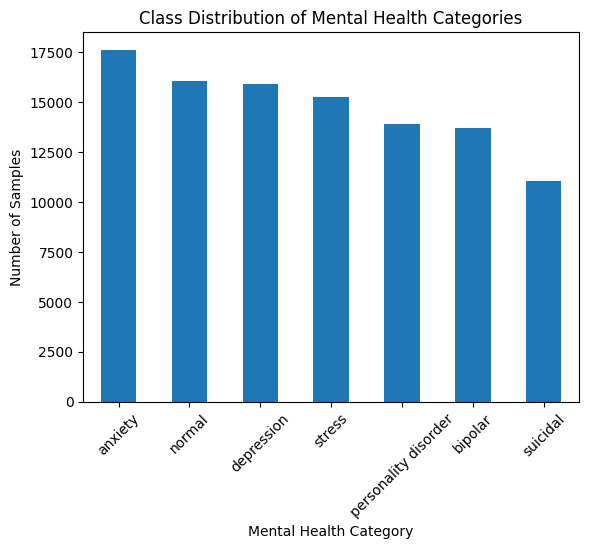

In [9]:
import matplotlib.pyplot as plt

class_counts.plot(kind="bar")
plt.title("Class Distribution of Mental Health Categories")
plt.xlabel("Mental Health Category")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df["status"])

LabelEncoder()

In [11]:
df["label"] = le.transform(df["status"])

In [12]:
label_names = le.classes_
num_labels = len(label_names)

label_names, num_labels

(array(['anxiety', 'bipolar', 'depression', 'normal',
        'personality disorder', 'stress', 'suicidal'], dtype=object),
 7)

In [13]:
df

,text,status,label
0,"""My mind is a never-ending cycle of worry, and...",anxiety,0
1,Despite the sun shining and birds singing outs...,bipolar,1
2,"I'm drowning in responsibilities, each one dem...",stress,5
3,"""My emotions shift like the wind, leaving me u...",personality disorder,4
4,"I'm trapped in a whirlwind of thoughts, unable...",anxiety,0
...,...,...,...
103483,"I long to embrace my true self, yet the mirror...",personality disorder,4
103484,"""My mind is a whirlwind of worst-case scenario...",anxiety,0
103485,Bipolar disorder: From elated excitement to cr...,bipolar,1
103486,"""Despite my best efforts, the constant stream ...",stress,5


In [14]:
from sklearn.model_selection import train_test_split

X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42
)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english", max_features=10000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [17]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.8711469707218089


In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
cm = confusion_matrix(y_test, y_pred)

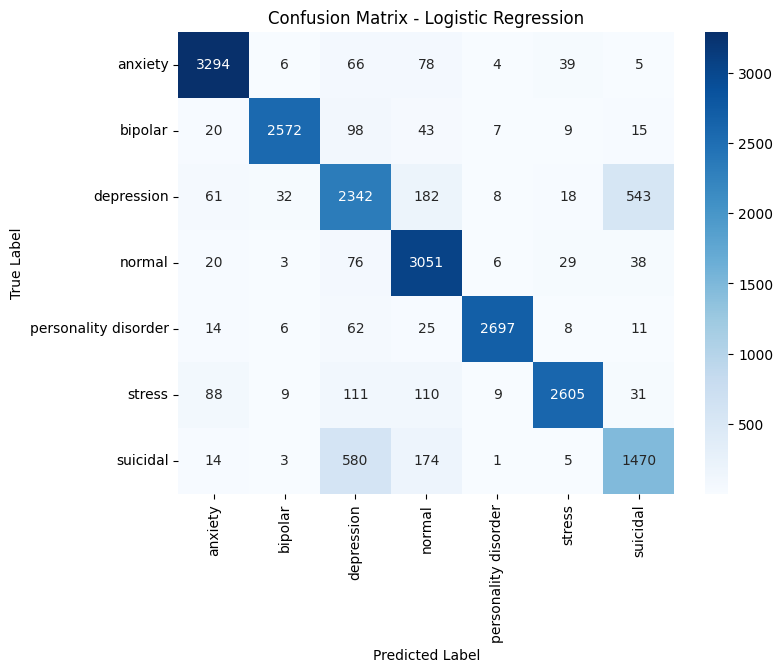

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [21]:
!pip install transformers torch

In [22]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader


In [23]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [24]:
class MentalHealthDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = tokenizer(
            self.texts.iloc[idx],
            padding="max_length",
            truncation=True,
            max_length=128,
            return_tensors="pt"
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(),
            "attention_mask": encoding["attention_mask"].squeeze(),
            "labels": torch.tensor(self.labels.iloc[idx])
        }

In [25]:
train_dataset = MentalHealthDataset(X_train, y_train)
test_dataset = MentalHealthDataset(X_test, y_test)

In [26]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

In [27]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=7
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [29]:
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=2e-5)

In [30]:
model.train()

for epoch in range(1):
    total_loss = 0

    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print("Epoch Loss:", total_loss / len(train_loader))

Epoch Loss: 0.3109782768714867


In [32]:
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        preds = torch.argmax(outputs.logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

In [33]:
from sklearn.metrics import accuracy_score

bert_accuracy = accuracy_score(all_labels, all_preds)
print("BERT Accuracy:", bert_accuracy)

BERT Accuracy: 0.902792540342062


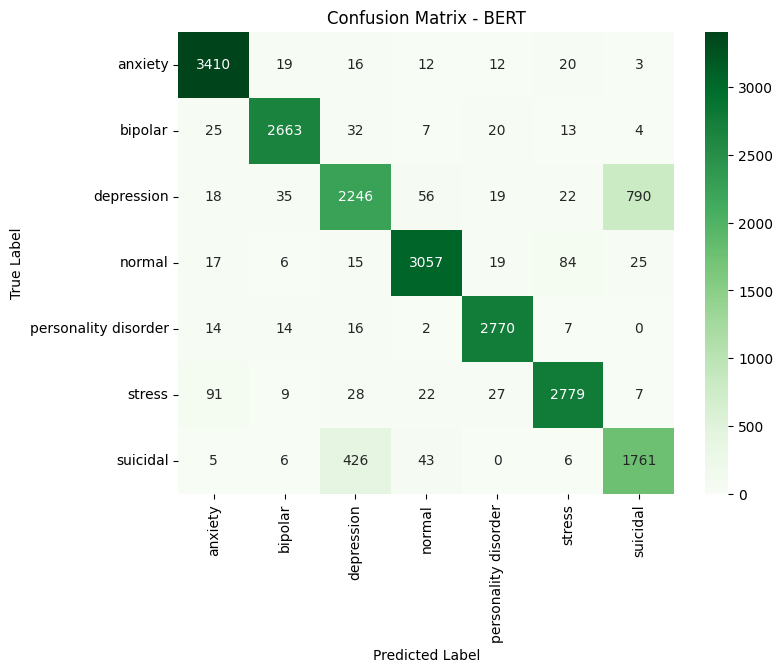

In [34]:
cm_bert = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm_bert,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - BERT")
plt.show()